# AIDS Virus Infection Prediction 💉

## Imports

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from joblib import dump
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load the Dataset 🚀

In [2]:
df = pd.read_csv('AIDS_Classification.csv')
df

time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      948    2   48   89.8128     0     0      0     100       0    0  ...   
1     1002    3   61   49.4424     0     0      0      90       0    1  ...   
2      961    3   45   88.4520     0     1      1      90       0    1  ...   
3     1166    3   47   85.2768     0     1      0     100       0    1  ...   
4     1090    0   43   66.6792     0     1      0     100       0    1  ...   
...    ...  ...  ...       ...   ...   ...    ...     ...     ...  ...  ...   
2134  1091    3   21   53.2980     1     0      0     100       0    1  ...   
2135   395    0   17  102.9672     1     0      0     100       0    1  ...   
2136  1104    2   53   69.8544     1     1      0      90       0    1  ...   
2137   465    0   14   60.0000     1     0      0     100       0    0  ...   
2138  1045    3   45   77.3000     1     0      0     100       0    0  ...   

      str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0        0      1        0      1       0   422    477   566    324         0  
1        1      3        0      1       0   162    218   392    564         1  
2        1      3        0      1       1   326    274  2063   1893         0  
3        1      3        0      1       0   287    394  1590    966         0  
4        1      3        0      0       0   504    353   870    782         0  
...    ...    ...      ...    ...     ...   ...    ...   ...    ...       ...  
2134     1      3        0      1       1   152    109   561    720         0  
2135     1      3        0      0       1   373    218  1759   1030         0  
2136     1      3        0      1       0   419    364  1391   1041         0  
2137     0      1        0      0       0   166    169   999   1838         1  
2138     0      1        0      1       0   911    930   885    526         0  

[2139 rows x 23 columns]

In [4]:
print(f'The number of people who do not have AIDS in Dataset: {df[df.infected == 0].shape[0]}')
print(f'The number of people who have AIDS in Dataset: {df[df.infected == 1].shape[0]}')

The number of people who do not have AIDS in Dataset: 1618
The number of people who have AIDS in Dataset: 521


The Dataset is not balanced so we have to pay attention to this point later !

## Check if it has missing values 🧐

In [5]:
df.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

Thanks god 😌😌😌

## EDA 🤔

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'trt'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'wtkg'}>,
        <Axes: title={'center': 'hemo'}>],
       [<Axes: title={'center': 'homo'}>,
        <Axes: title={'center': 'drugs'}>,
        <Axes: title={'center': 'karnof'}>,
        <Axes: title={'center': 'oprior'}>,
        <Axes: title={'center': 'z30'}>],
       [<Axes: title={'center': 'preanti'}>,
        <Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'str2'}>,
        <Axes: title={'center': 'strat'}>],
       [<Axes: title={'center': 'symptom'}>,
        <Axes: title={'center': 'treat'}>,
        <Axes: title={'center': 'offtrt'}>,
        <Axes: title={'center': 'cd40'}>,
        <Axes: title={'center': 'cd420'}>],
       [<Axes: title={'center': 'cd80'}>,
        <Axes: title={'center': 'cd820'}>,
        <Axes: title={'center': 'infected'}>, <Axes: >, <Axes: >

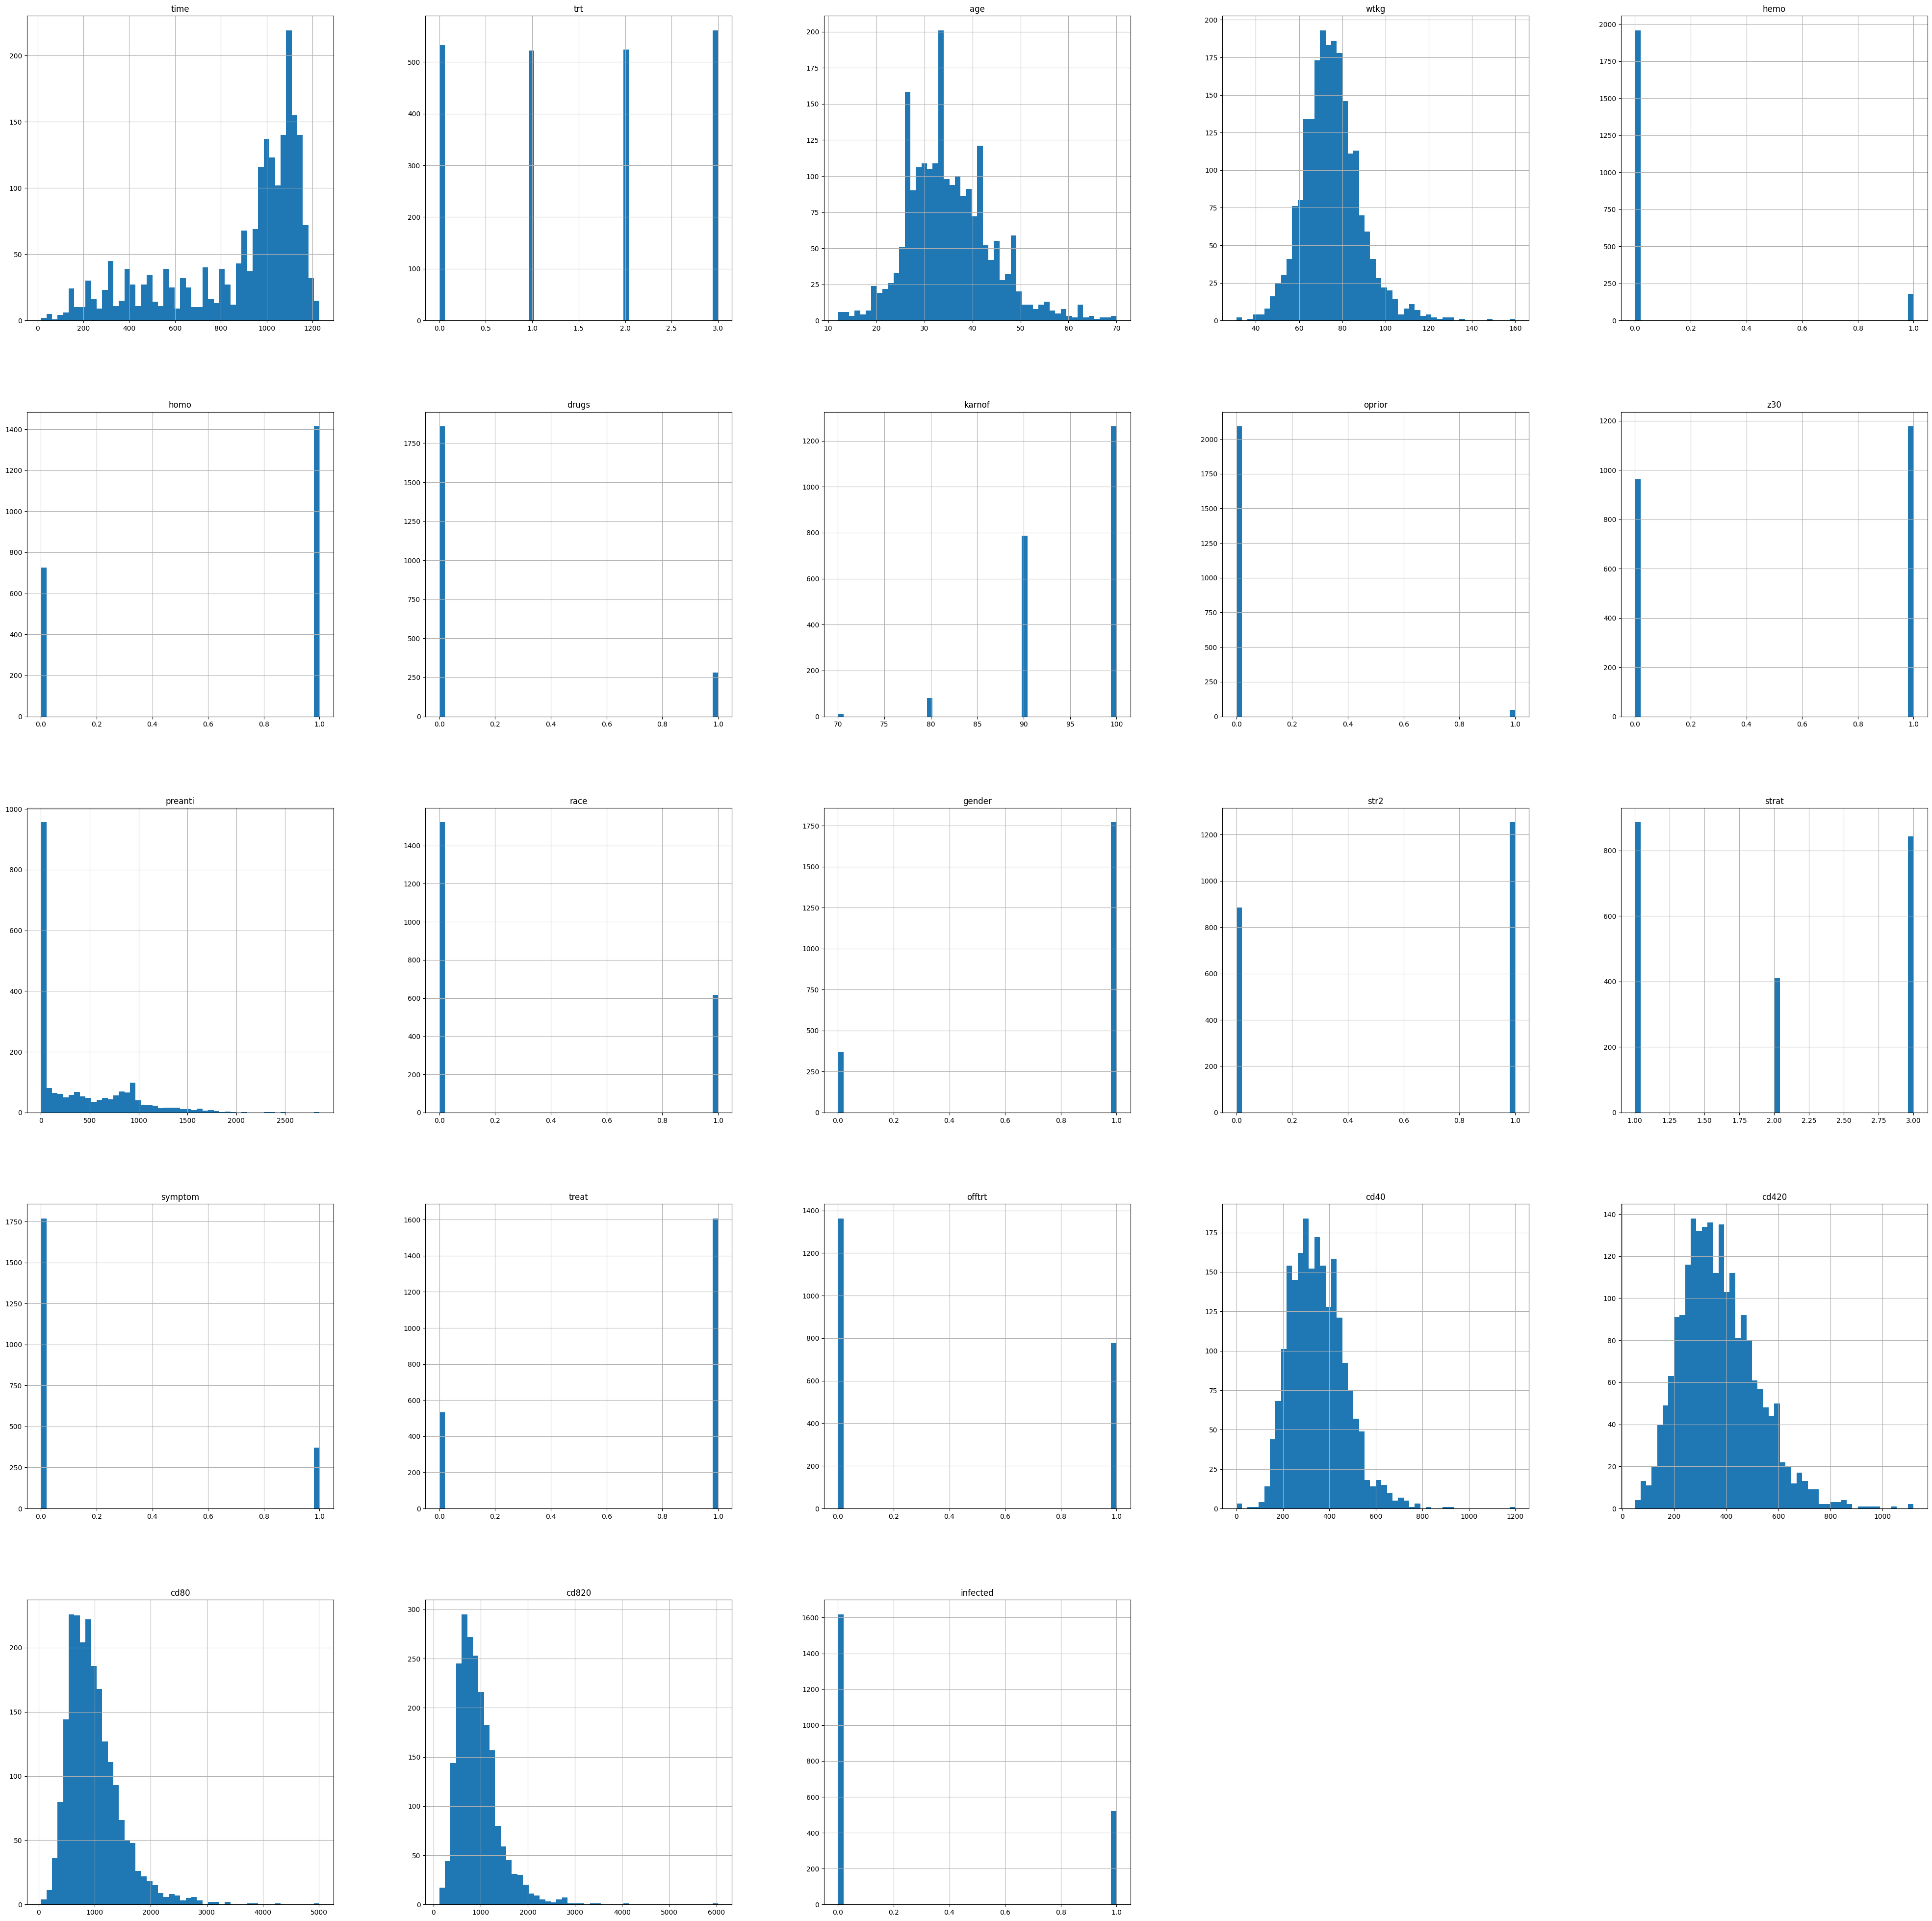

In [12]:
df.hist(bins=50, figsize=(50, 50))

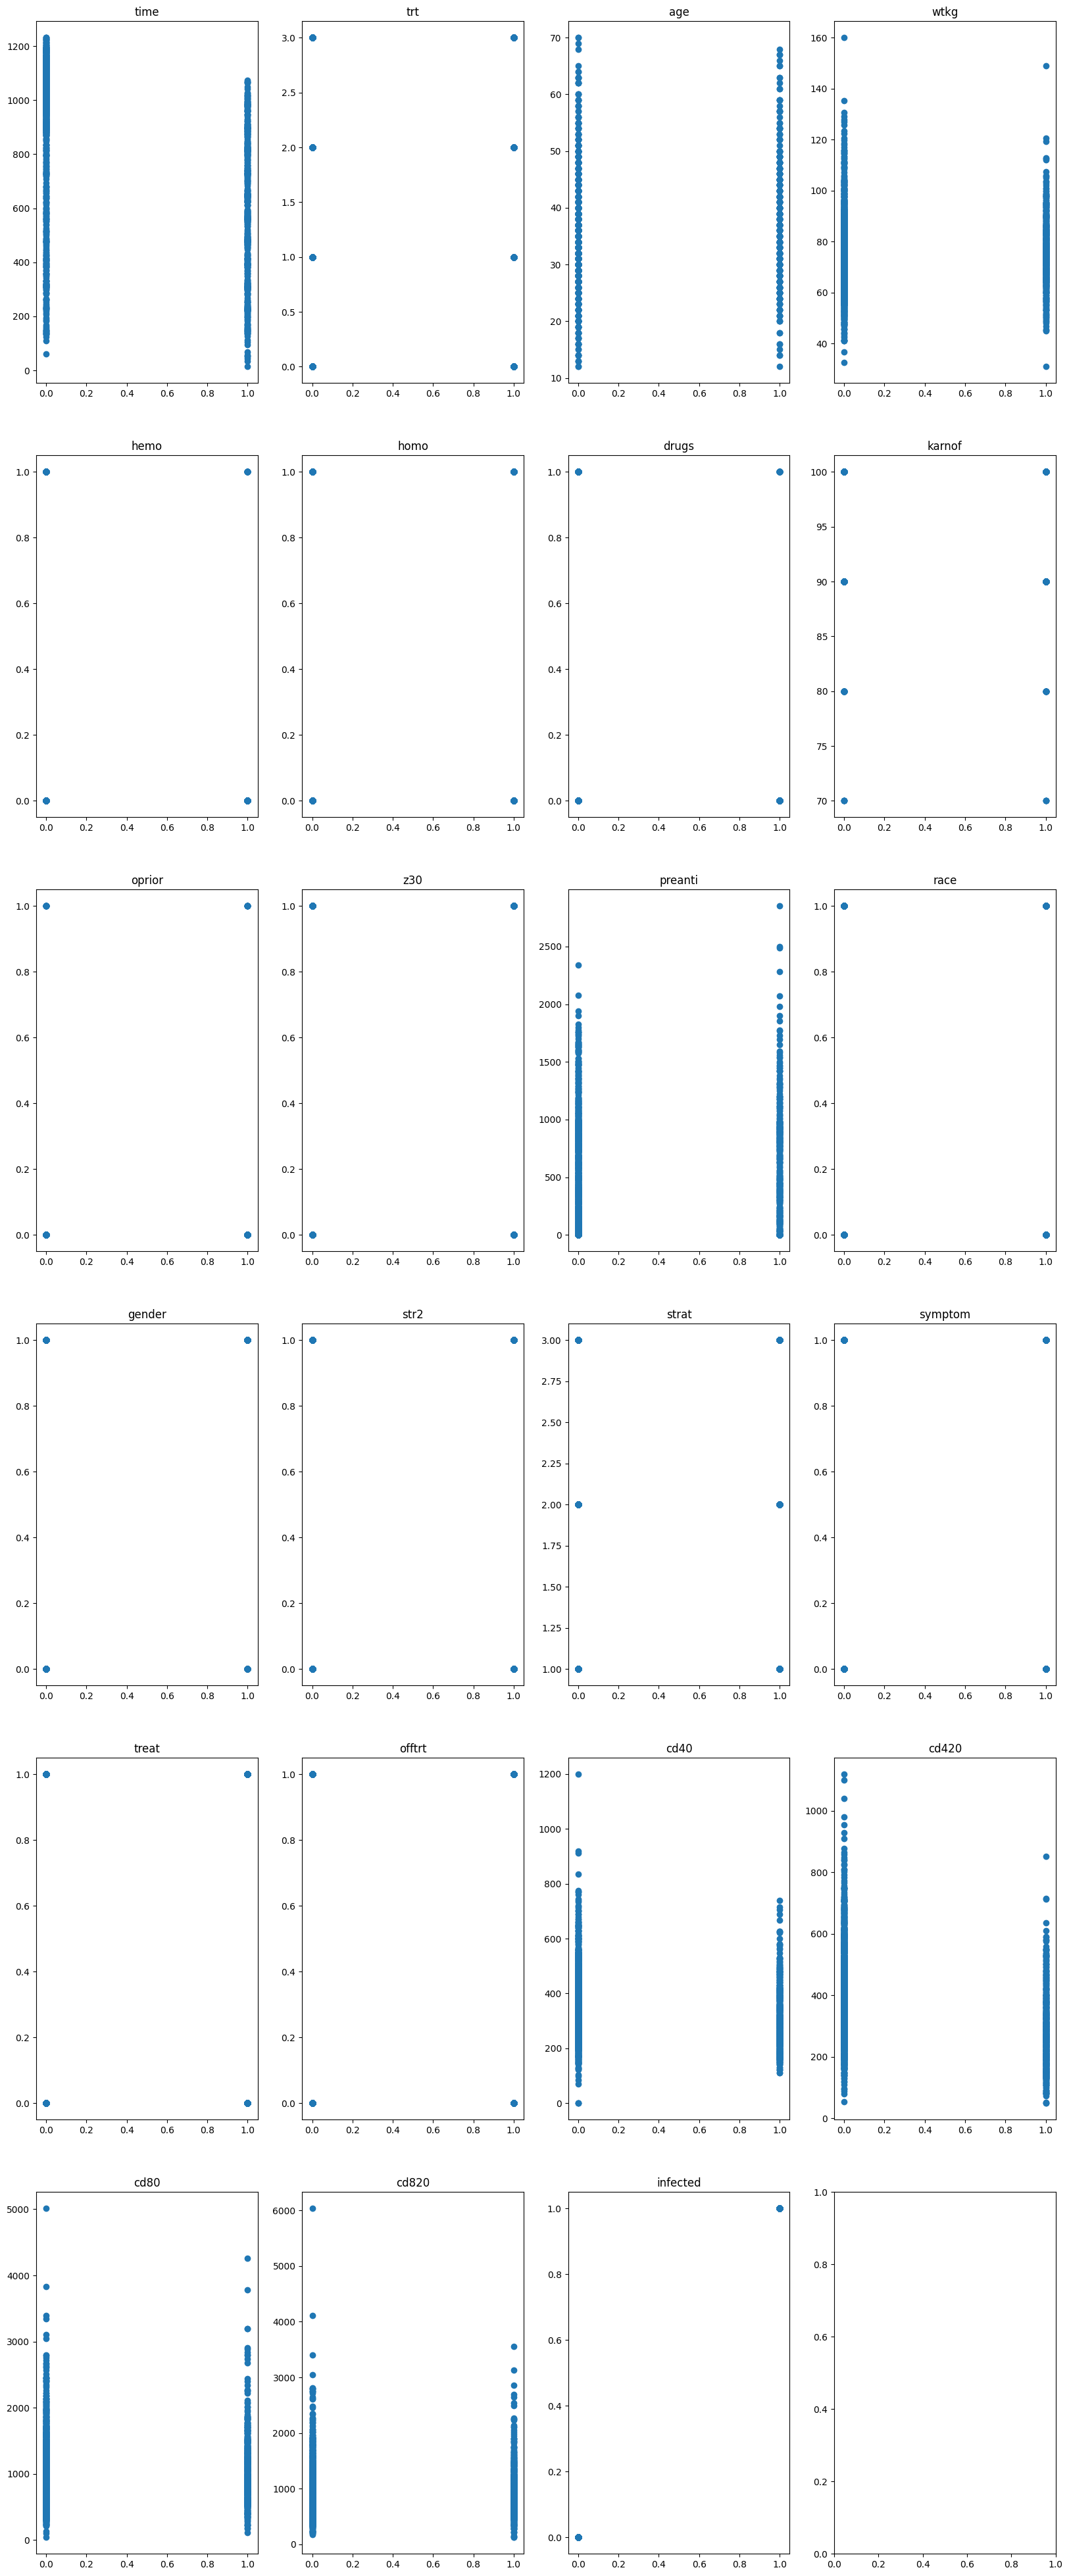

In [15]:
fig, axes = plt.subplots(6, 4, figsize=(20, 50))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flat[i]
  ax.scatter(df['infected'], df[col])
  ax.set_title(col)

In [16]:
corr = df.corr()
corr

time       trt       age      wtkg      hemo      homo  \
time      1.000000  0.101482  0.026544  0.009225 -0.017501  0.043430   
trt       0.101482  1.000000 -0.001931 -0.031685  0.012329  0.025035   
age       0.026544 -0.001931  1.000000  0.132858 -0.231257  0.158917   
wtkg      0.009225 -0.031685  0.132858  1.000000 -0.075791  0.155909   
hemo     -0.017501  0.012329 -0.231257 -0.075791  1.000000 -0.391307   
homo      0.043430  0.025035  0.158917  0.155909 -0.391307  1.000000   
drugs    -0.021856  0.005712  0.077446  0.002343 -0.092957 -0.206876   
karnof    0.094417 -0.014573 -0.100041  0.034271  0.068403 -0.042072   
oprior   -0.016116 -0.026805  0.056161  0.009607  0.034978  0.019743   
z30       0.012898 -0.001656  0.061178 -0.073841  0.111554 -0.049760   
preanti   0.007249  0.006710  0.113220 -0.079292  0.113892  0.014132   
race     -0.051276  0.017080 -0.097678 -0.081452 -0.070333 -0.307108   
gender    0.020810  0.022691  0.048705  0.240013  0.115867  0.607820   
str2      0.010098 -0.003003  0.068230 -0.078885  0.124983 -0.036700   
strat     0.022033 -0.003508  0.089884 -0.080458  0.141674 -0.022608   
symptom  -0.104611 -0.000765  0.032814  0.003942 -0.076296  0.118575   
treat     0.153314  0.775990  0.001499 -0.040638  0.010786  0.024407   
offtrt   -0.475795 -0.043239 -0.057695 -0.003159  0.005949 -0.045151   
cd40      0.191436 -0.012770 -0.040302  0.036401 -0.022533  0.000511   
cd420     0.350611  0.064448 -0.044294  0.020980 -0.065838  0.019915   
cd80     -0.017425 -0.015665  0.046874  0.090075 -0.037273  0.086028   
cd820     0.032480 -0.004595  0.037458  0.085447 -0.058392  0.082284   
infected -0.574989 -0.084360  0.070384  0.016205 -0.011154  0.054279   

             drugs    karnof    oprior       z30  ...      str2     strat  \
time     -0.021856  0.094417 -0.016116  0.012898  ...  0.010098  0.022033   
trt       0.005712 -0.014573 -0.026805 -0.001656  ... -0.003003 -0.003508   
age       0.077446 -0.100041  0.056161  0.061178  ...  0.068230  0.089884   
wtkg      0.002343  0.034271  0.009607 -0.073841  ... -0.078885 -0.080458   
hemo     -0.092957  0.068403  0.034978  0.111554  ...  0.124983  0.141674   
homo     -0.206876 -0.042072  0.019743 -0.049760  ... -0.036700 -0.022608   
drugs     1.000000 -0.084558 -0.029968  0.014961  ...  0.001106 -0.011319   
karnof   -0.084558  1.000000 -0.057291 -0.074947  ... -0.085975 -0.055172   
oprior   -0.029968 -0.057291  1.000000 -0.037580  ...  0.126040  0.134629   
z30       0.014961 -0.074947 -0.037580  1.000000  ...  0.903417  0.848624   
preanti  -0.029981 -0.023189  0.067082  0.655054  ...  0.680354  0.833213   
race      0.082311  0.026155 -0.003923 -0.073658  ... -0.080510 -0.106307   
gender   -0.141748 -0.011695  0.042976 -0.036119  ... -0.031258  0.003586   
str2      0.001106 -0.085975  0.126040  0.903417  ...  1.000000  0.916723   
strat    -0.011319 -0.055172  0.134629  0.848624  ...  0.916723  1.000000   
symptom   0.027052 -0.107940  0.024199  0.020883  ...  0.030760  0.041857   
treat     0.022055  0.001379 -0.031801  0.003776  ...  0.005794 -0.000836   
offtrt    0.098031 -0.103251  0.019561 -0.029318  ... -0.026789 -0.051276   
cd40     -0.003360  0.077730 -0.059199 -0.121282  ... -0.124566 -0.121317   
cd420     0.013109  0.098463 -0.109643 -0.200149  ... -0.216457 -0.206306   
cd80      0.014900 -0.008567 -0.019247  0.029346  ...  0.009576  0.032360   
cd820     0.025728 -0.003981 -0.036577  0.018454  ...  0.012055  0.021257   
infected -0.049794 -0.102944  0.041251  0.125488  ...  0.123390  0.131441   

           symptom     treat    offtrt      cd40     cd420      cd80  \
time     -0.104611  0.153314 -0.475795  0.191436  0.350611 -0.017425   
trt      -0.000765  0.775990 -0.043239 -0.012770  0.064448 -0.015665   
age       0.032814  0.001499 -0.057695 -0.040302 -0.044294  0.046874   
wtkg      0.003942 -0.040638 -0.003159  0.036401  0.020980  0.090075   
hemo     -0.076296  0.010786  0.005949 -0.022533 -0.065838 -0.037273   
homo

In [22]:
corr['infected'].sort_values()

time       -0.574989
cd420      -0.345908
cd40       -0.185647
treat      -0.129560
karnof     -0.102944
trt        -0.084360
race       -0.055977
drugs      -0.049794
hemo       -0.011154
wtkg        0.016205
cd820       0.019494
oprior      0.041251
gender      0.045118
homo        0.054279
cd80        0.065338
age         0.070384
offtrt      0.092850
str2        0.123390
z30         0.125488
preanti     0.128453
symptom     0.129234
strat       0.131441
infected    1.000000
Name: infected, dtype: float64

<Axes: >

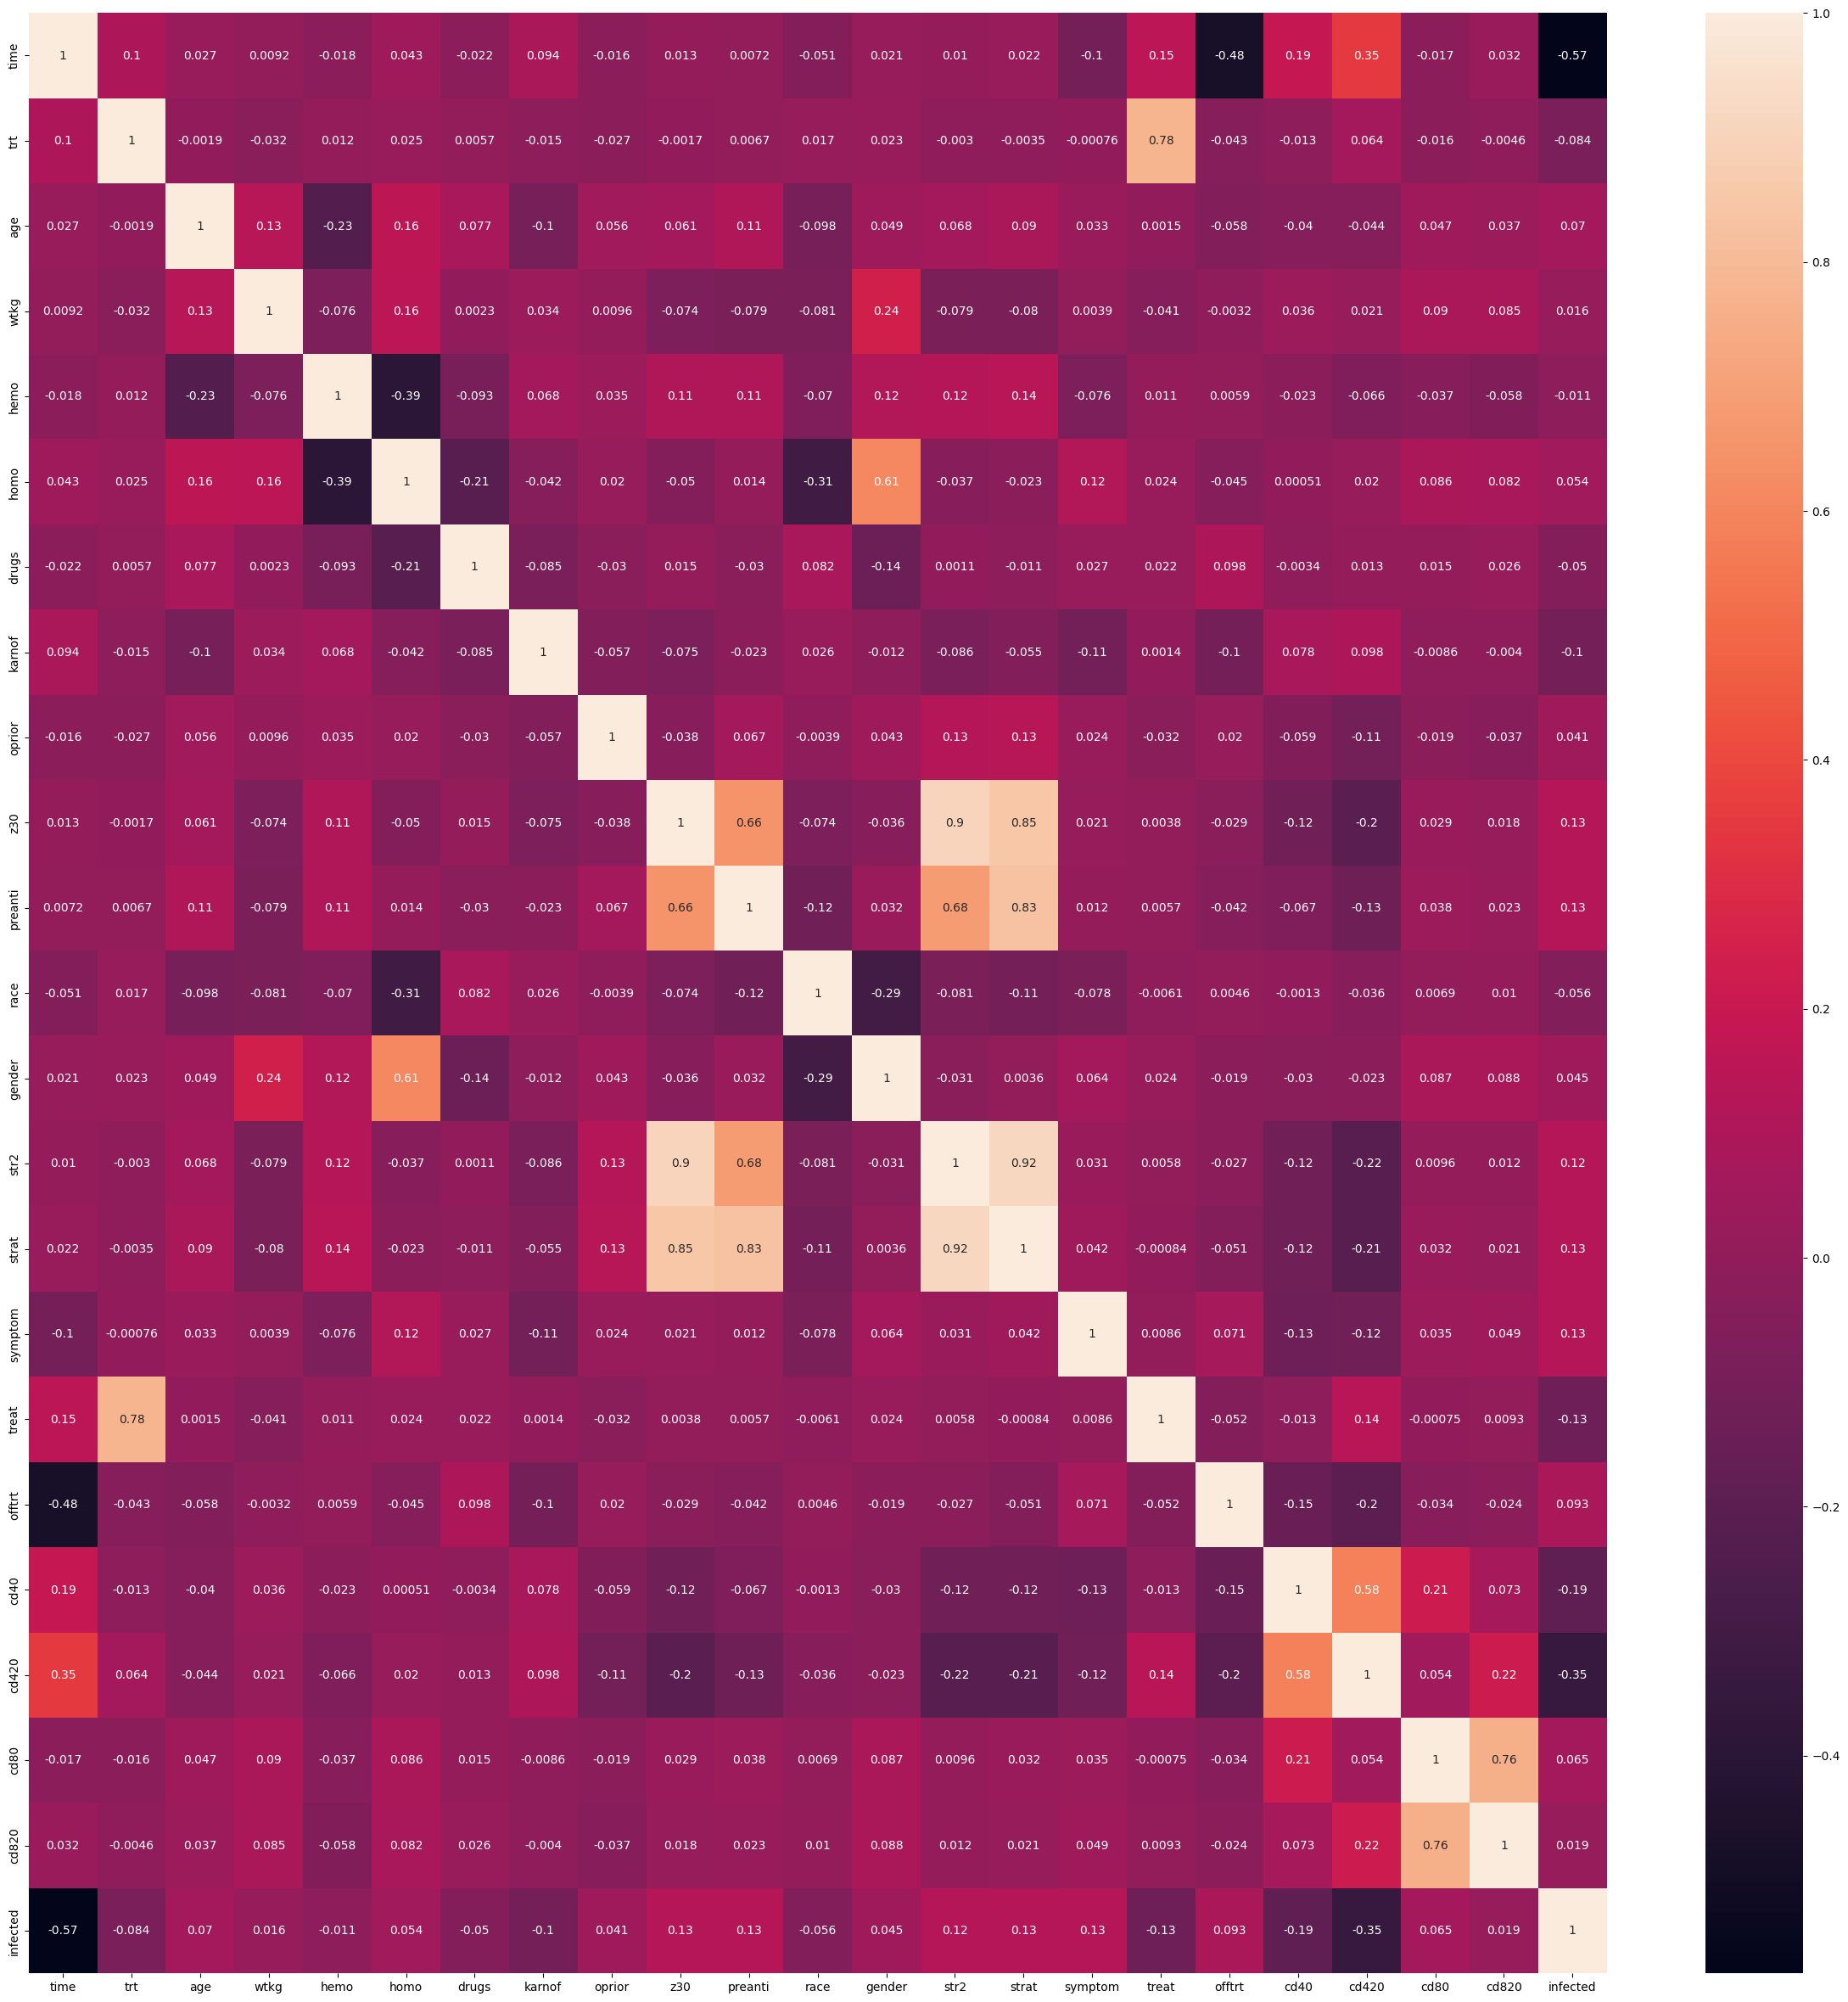

In [28]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

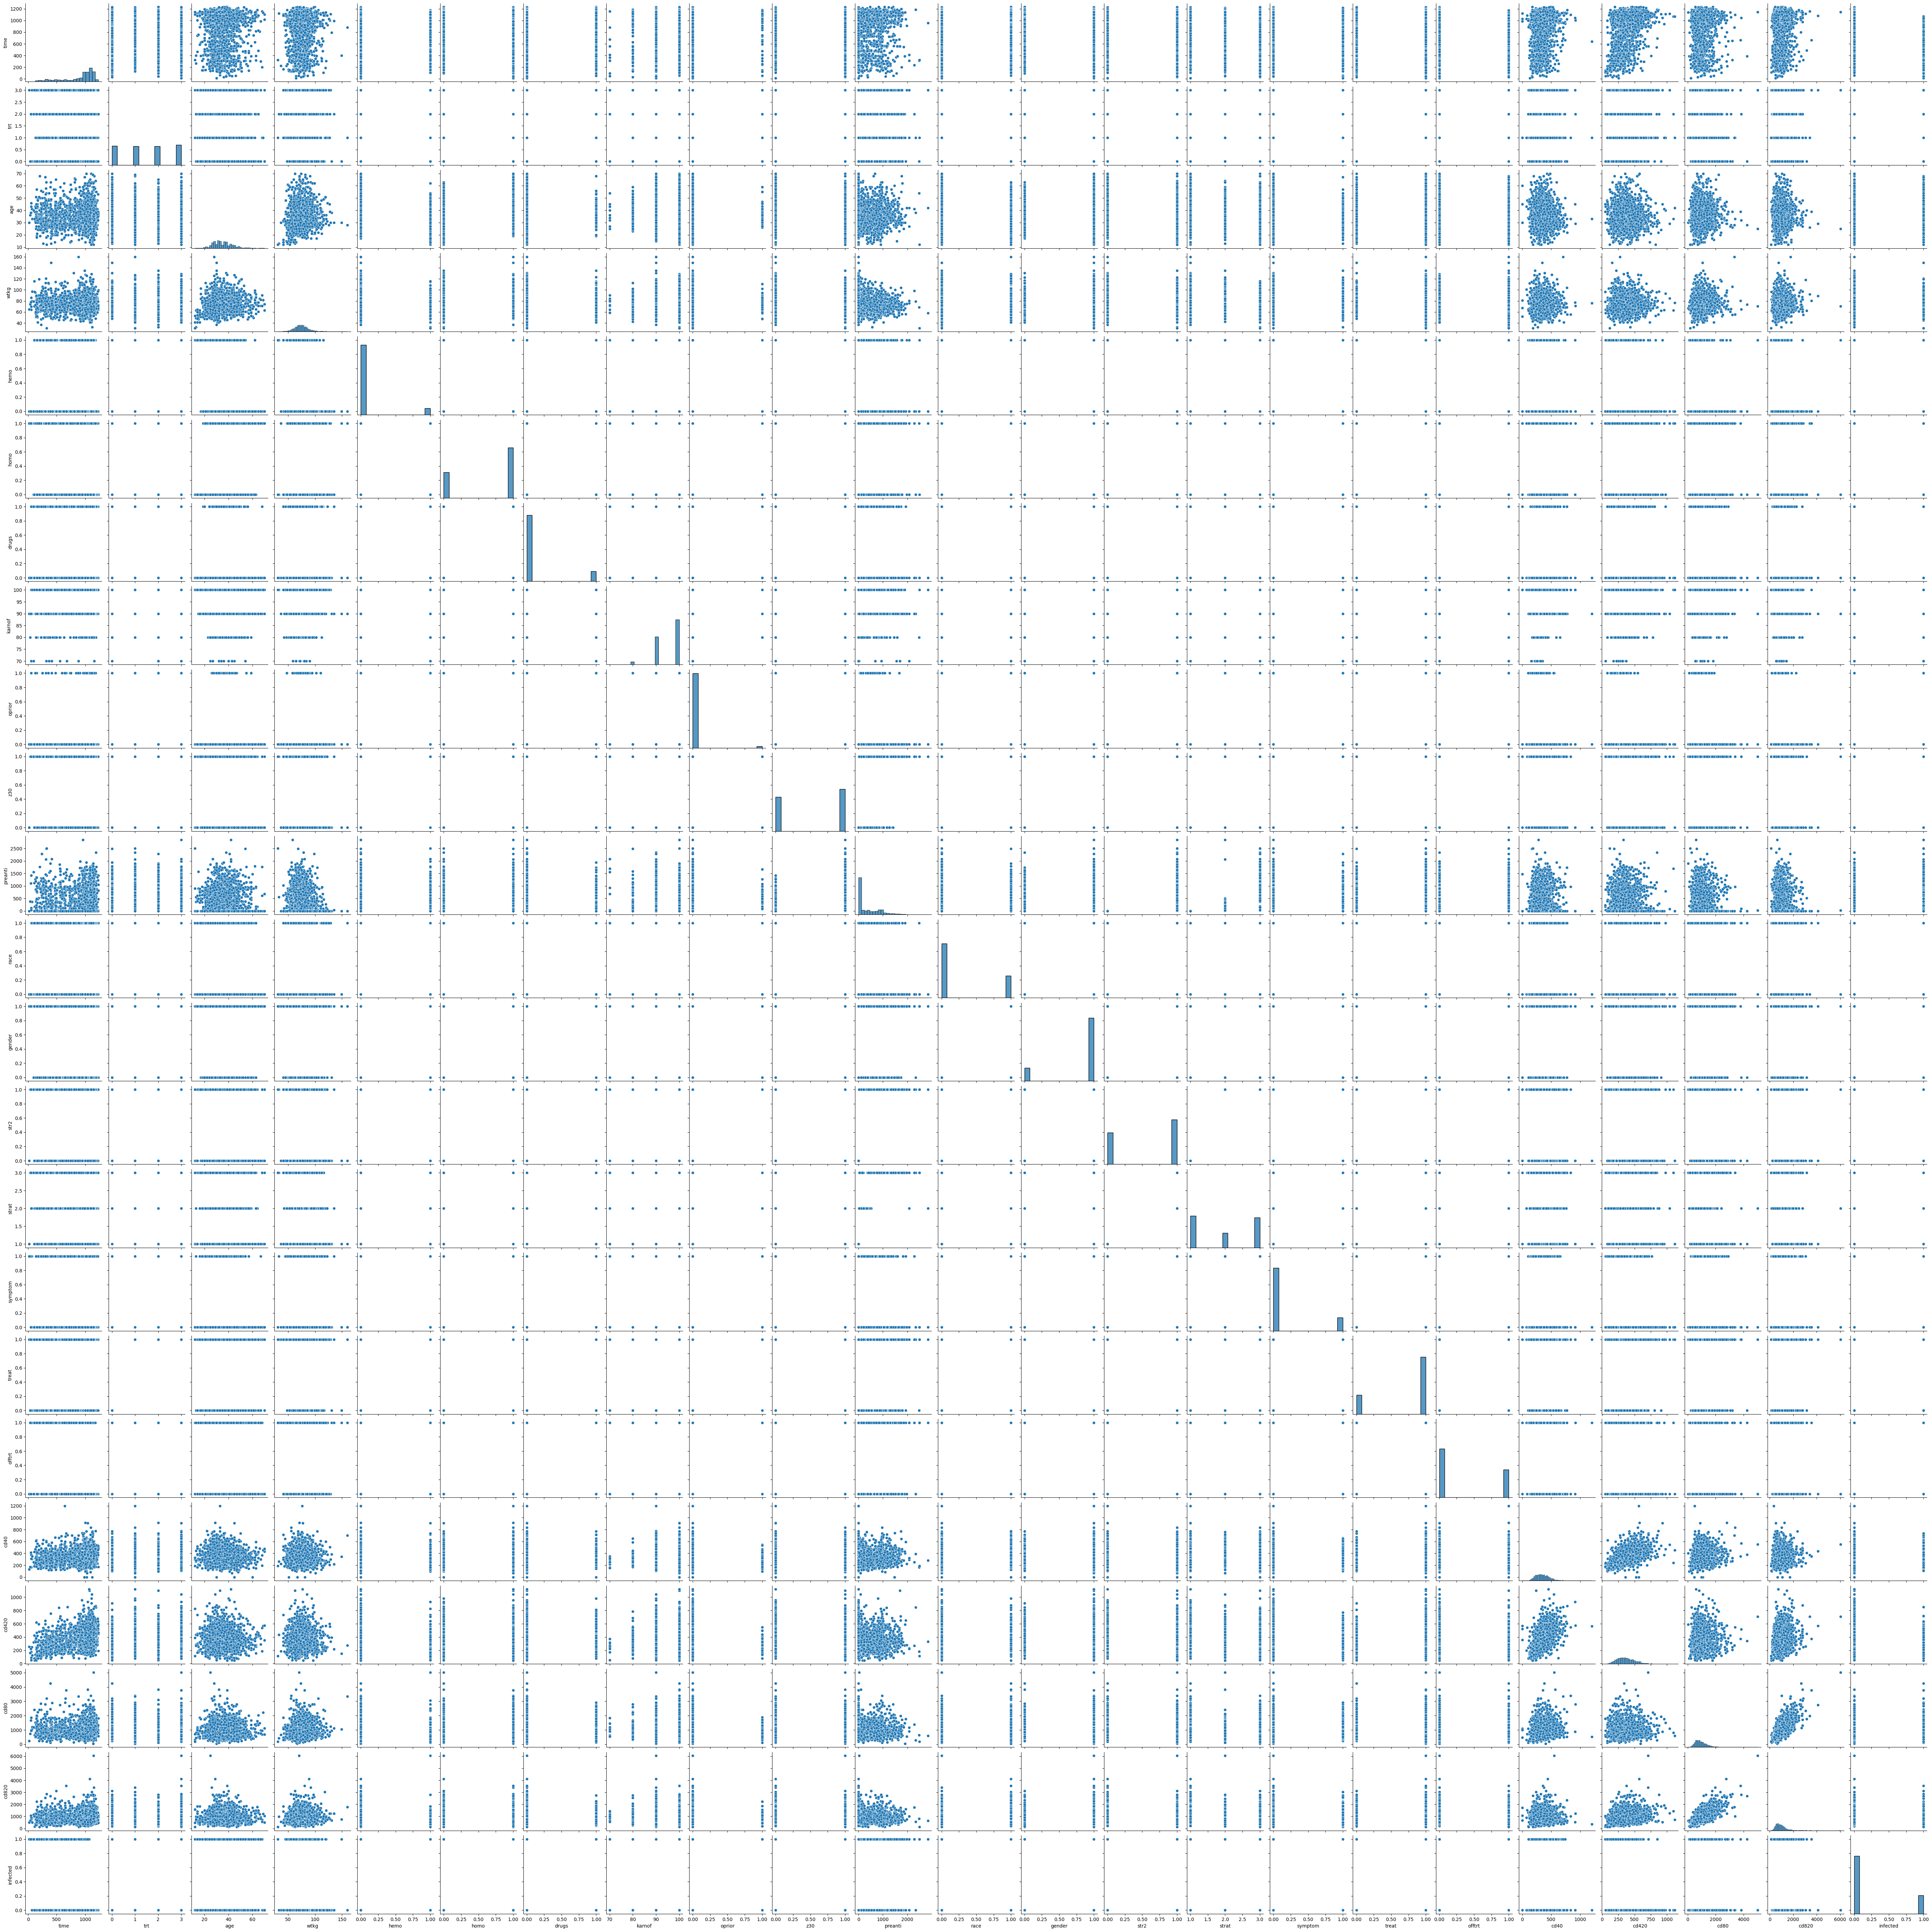

In [31]:
sns.pairplot(df)

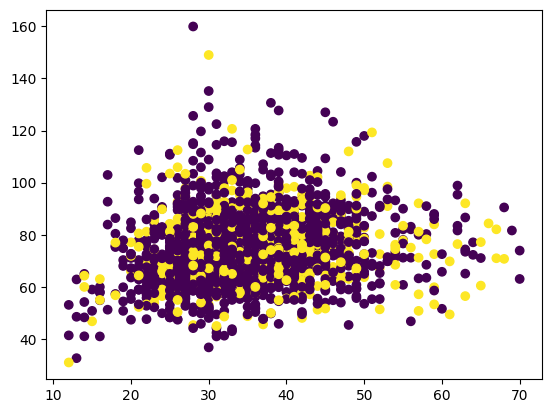

In [32]:
plt.scatter(df['age'], df['wtkg'], c=df['infected'])

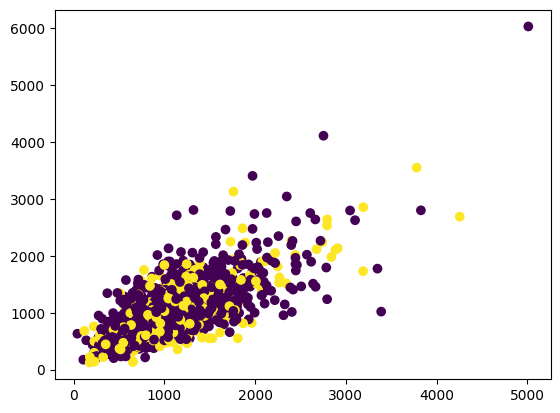

In [34]:
plt.scatter(df['cd80'], df['cd820'], c=df['infected'])

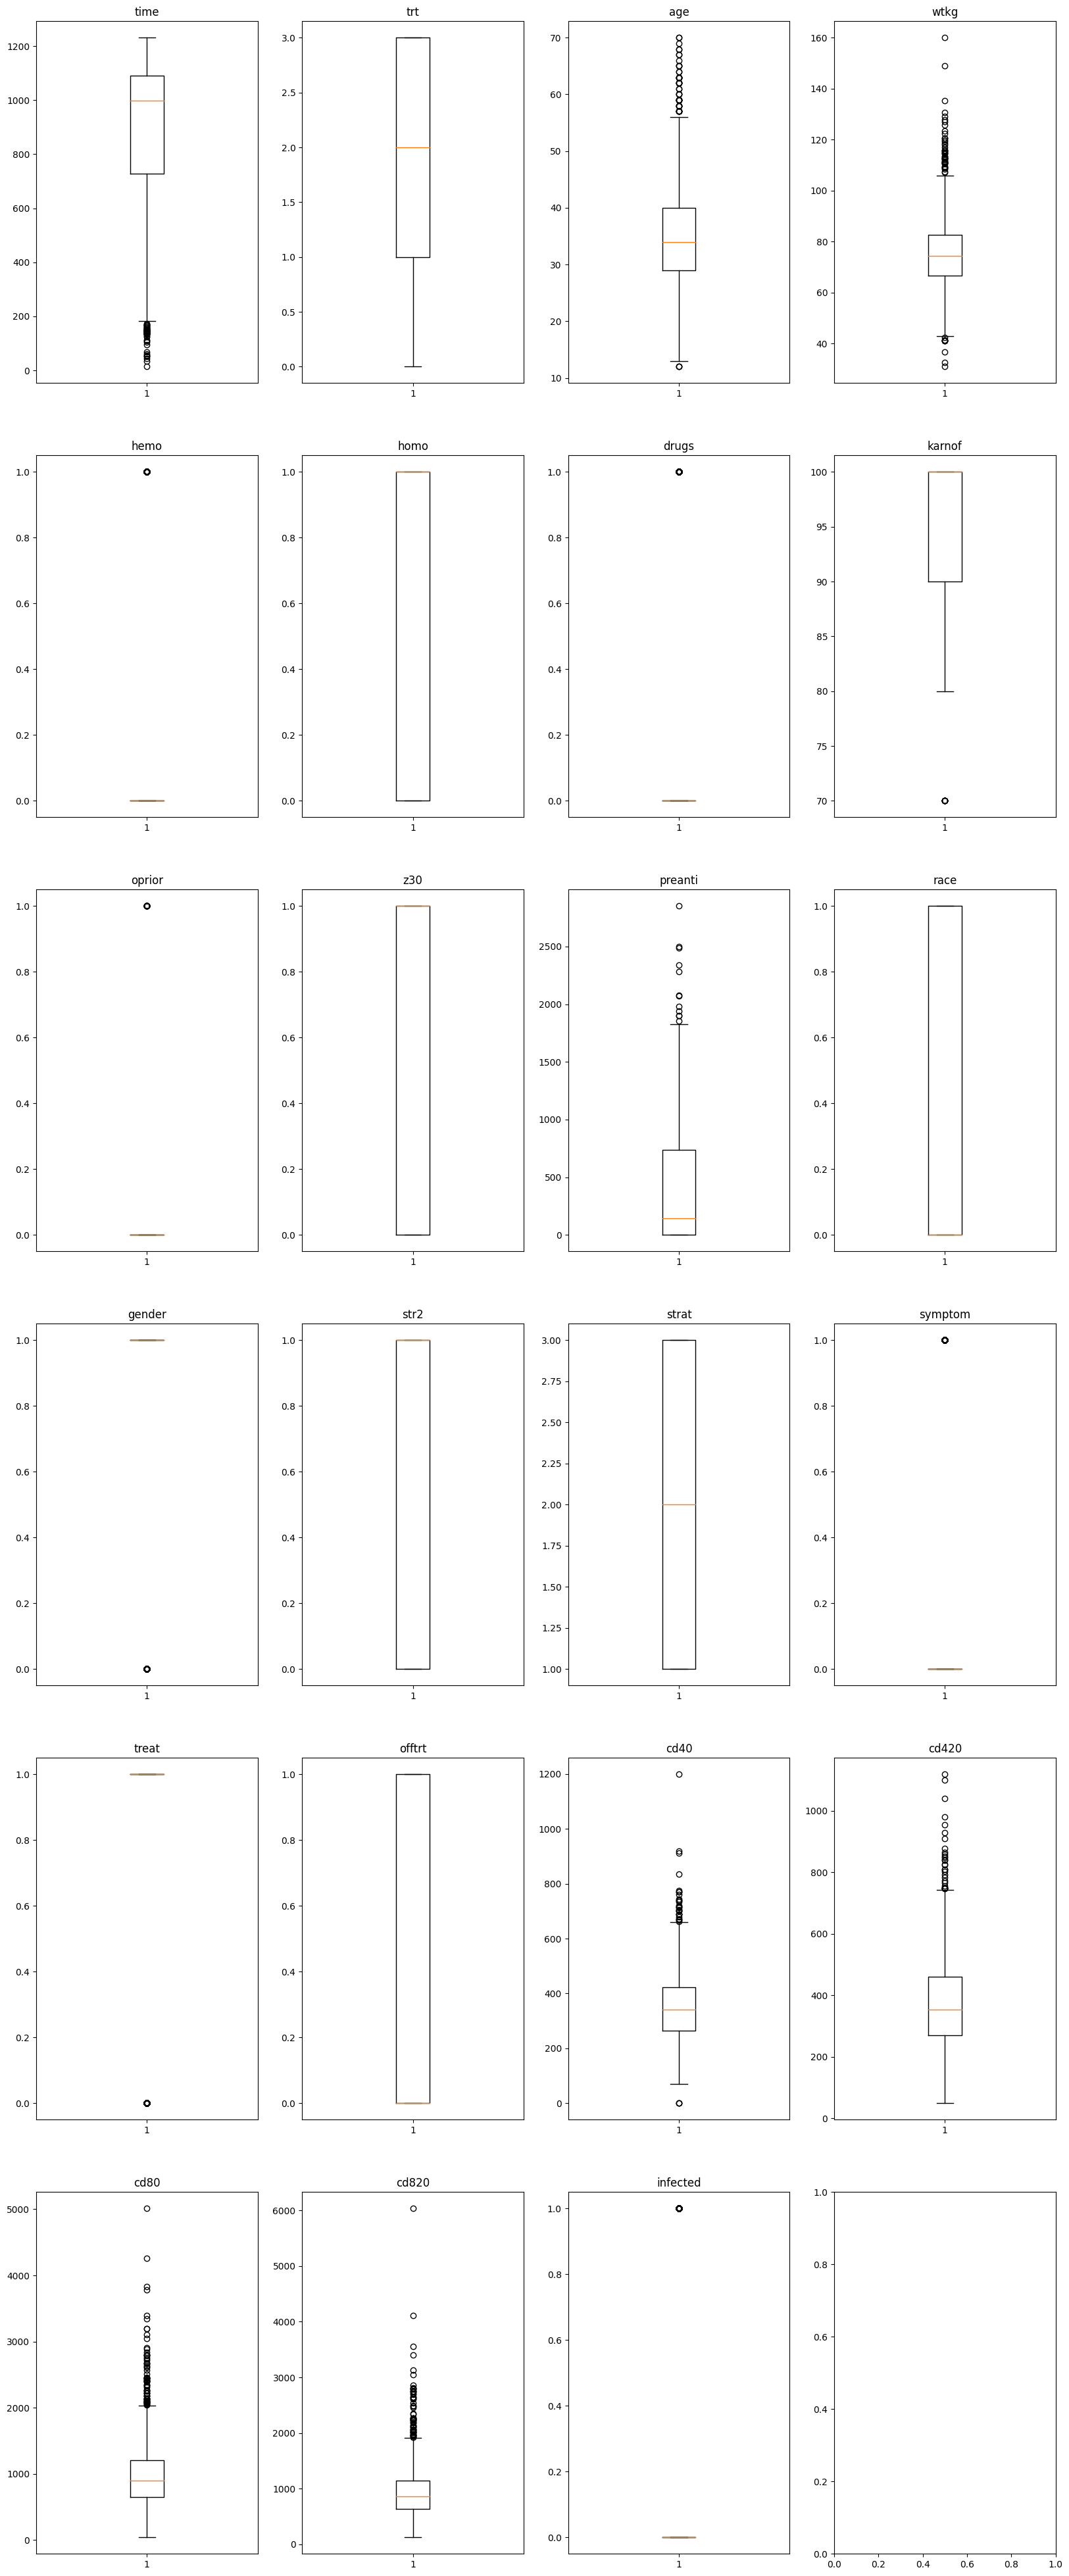

In [35]:
fig, axes = plt.subplots(6, 4, figsize=(20, 50))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flat[i]
  ax.boxplot(df[col])
  ax.set_title(col)

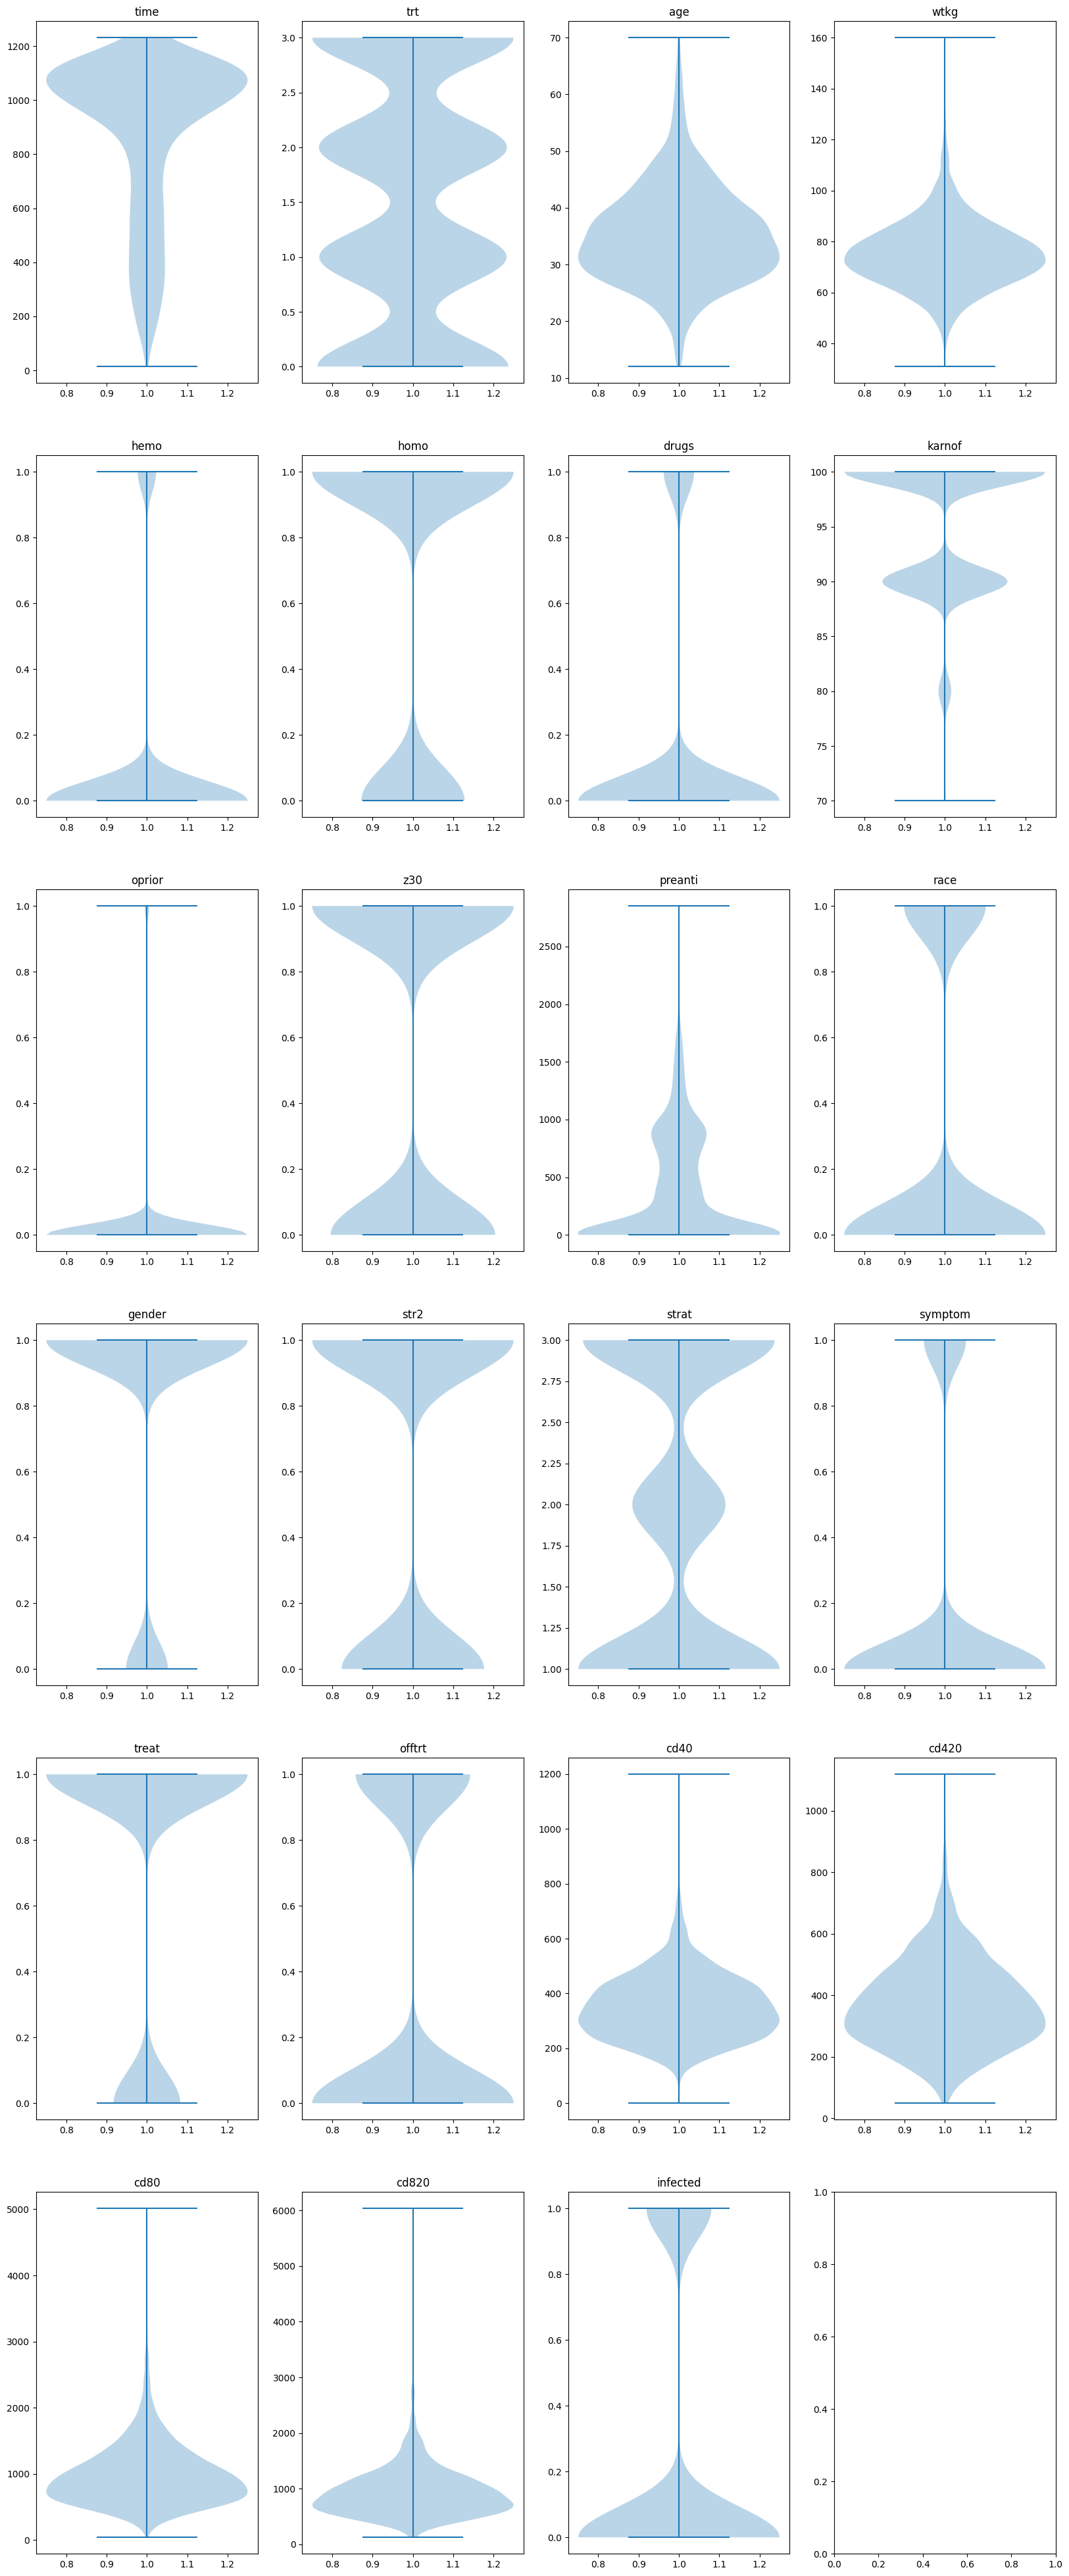

In [37]:
fig, axes = plt.subplots(6, 4, figsize=(20, 50))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flat[i]
  ax.violinplot(df[col])
  ax.set_title(col)

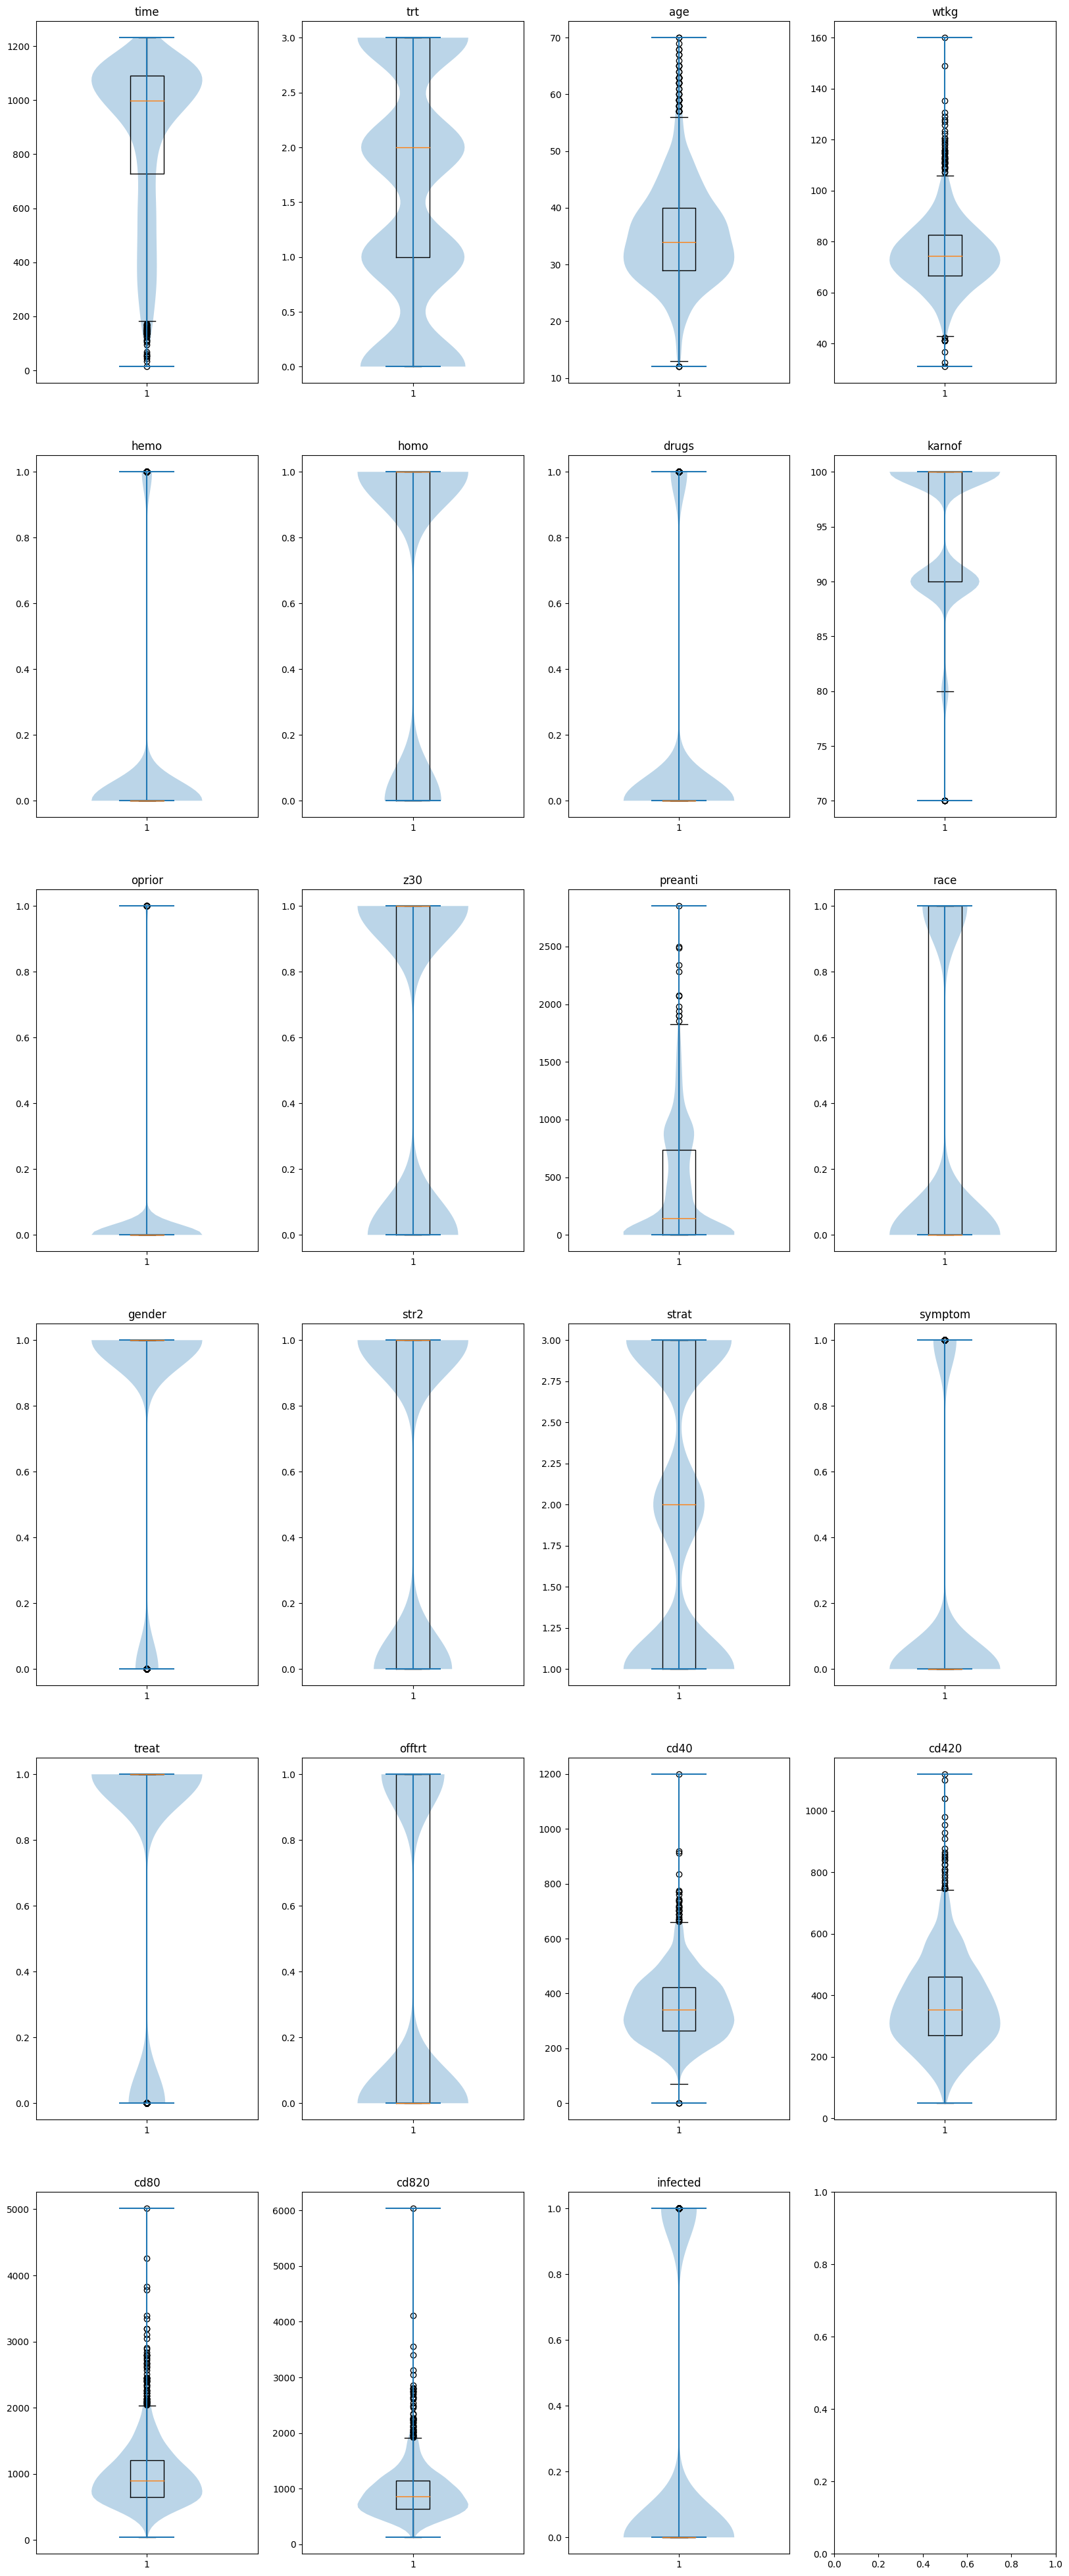

In [38]:
fig, axes = plt.subplots(6, 4, figsize=(20, 50))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flat[i]
  ax.boxplot(df[col])
  ax.violinplot(df[col])
  ax.set_title(col)

In [39]:
df.describe()

time          trt          age         wtkg         hemo  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean    879.098177     1.520804    35.248247    75.125311     0.084151   
std     292.274324     1.127890     8.709026    13.263164     0.277680   
min      14.000000     0.000000    12.000000    31.000000     0.000000   
25%     727.000000     1.000000    29.000000    66.679200     0.000000   
50%     997.000000     2.000000    34.000000    74.390400     0.000000   
75%    1091.000000     3.000000    40.000000    82.555200     0.000000   
max    1231.000000     3.000000    70.000000   159.939360     1.000000   

              homo        drugs       karnof       oprior          z30  ...  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000  ...   
mean      0.661057     0.131370    95.446470     0.021973     0.550257  ...   
std       0.473461     0.337883     5.900985     0.146629     0.497584  ...   
min       0.000000     0.000000    70.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000    90.000000     0.000000     0.000000  ...   
50%       1.000000     0.000000   100.000000     0.000000     1.000000  ...   
75%       1.000000     0.000000   100.000000     0.000000     1.000000  ...   
max       1.000000     1.000000   100.000000     1.000000     1.000000  ...   

              str2        strat      symptom        treat       offtrt  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean      0.585788     1.979897     0.172978     0.751286     0.362786   
std       0.492701     0.899053     0.378317     0.432369     0.480916   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     2.000000     0.000000     1.000000     0.000000   
75%       1.000000     3.000000     0.000000     1.000000     1.000000   
max       1.000000     3.000000     1.000000     1.000000     1.000000   

              cd40        cd420         cd80        cd820     infected  
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000  
mean    350.501169   371.307153   986.627396   935.369799     0.243572  
std     118.573863   144.634909   480.197750   444.976051     0.429338  
min       0.000000    49.000000    40.000000   124.000000     0.000000  
25%     263.500000   269.000000   654.000000   631.500000     0.000000  
50%     340.000000   353.000000   893.000000   865.000000     0.000000  
75%     423.000000   460.000000  1207.000000  1146.500000     0.000000  
max    1199.000000  1119.000000  5011.000000  6035.000000     1.000000  

[8 rows x 23 columns]

## Train test split 🙂

In [41]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x.shape, y.shape

((2139, 22), (2139,))

In [43]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print()
print(f'x_valid: {x_valid.shape}')
print(f'y_valid: {y_valid.shape}')

x_train: (1711, 22)
y_train: (1711,)

x_valid: (428, 22)
y_valid: (428,)


In [51]:
print(f'The percentage of people with AIDS in y_train: {(len(y_train[y_train == 1]) / len(y_train)) * 100:.4}')
print(f'The percentage of people with AIDS in y_valid: {(len(y_valid[y_valid == 1]) / len(y_valid)) * 100:.4}')

The percentage of people with AIDS in y_train: 24.37
The percentage of people with AIDS in y_valid: 24.3


We properly separated our training values so that the distribution of the data is not skewed 🤩

## Feature Transform and standardization 😃

In [52]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt

PowerTransformer()

In [53]:
x_train_t = pt.fit_transform(x_train)
print(x_train_t[:5, :])

[[ 0.15202531 -1.40237052  0.39438354  0.2643518  -0.29968136 -1.42043539
   2.67350314 -1.1157795  -0.14866993  0.89184248  1.0293499   1.57405282
  -2.24631618  0.83008581  1.10609398 -0.46668361 -1.71799335  1.33665439
   0.10271549 -0.10997269 -1.22745792 -0.72477341]
 [-0.16910446 -0.38208414  0.39438354 -0.50615469 -0.29968136  0.7040095
  -0.37404108  0.82861974 -0.14866993 -1.12127425 -1.15387306 -0.6353027
   0.44517331 -1.20469473 -1.12571012  2.14277933  0.58207443 -0.74813655
  -1.5983503   0.50582125  0.70406922  1.04373593]
 [ 0.19960095  1.24941551 -0.56241847  0.32185278 -0.29968136  0.7040095
  -0.37404108  0.82861974 -0.14866993 -1.12127425 -1.15387306 -0.6353027
   0.44517331 -1.20469473 -1.12571012 -0.46668361  0.58207443 -0.74813655
   0.37508583 -0.01050072 -0.67889821 -1.66674096]
 [-0.17772988  1.24941551 -0.82995644 -1.37945122 -0.29968136  0.7040095
  -0.37404108  0.82861974 -0.14866993 -1.12127425  1.12068302  1.57405282
   0.44517331  0.83008581  1.10609398 

In [54]:
x_valid_t = pt.transform(x_valid)
print(x_valid_t[:5, :])

[[ 0.89378342 -1.40237052 -1.72499482 -0.5449333  -0.29968136 -1.42043539
  -0.37404108 -1.1157795  -0.14866993  0.89184248 -0.13575064  1.57405282
  -2.24631618  0.83008581  0.12735848 -0.46668361 -1.71799335  1.33665439
   0.3831956  -0.82362492 -1.10695306 -0.77529829]
 [-0.51175155  1.24941551  0.50339695 -0.12187788 -0.29968136  0.7040095
  -0.37404108 -1.1157795  -0.14866993 -1.12127425  0.05536155 -0.6353027
   0.44517331  0.83008581  0.12735848 -0.46668361  0.58207443  1.33665439
   0.62284216  0.2285933   0.84167551  0.97943733]
 [-1.76727435  1.24941551 -1.25824221 -1.24648833 -0.29968136  0.7040095
  -0.37404108  0.82861974 -0.14866993  0.89184248  0.95182441 -0.6353027
   0.44517331  0.83008581  1.10609398 -0.46668361  0.58207443  1.33665439
  -1.3613041  -1.41217068 -0.00765691  0.69219777]
 [ 0.21398723  1.24941551  0.92020067  0.22022228 -0.29968136  0.7040095
   2.67350314 -1.1157795  -0.14866993 -1.12127425 -1.15387306 -0.6353027
   0.44517331 -1.20469473 -1.12571012 -

## Train the Models 😎

In [57]:
model1 = LogisticRegression(random_state=42)
model1.fit(x_train_t, y_train)

print(f'The score of LogisticRegression: {model1.score(x_valid_t, y_valid)}')

The score of LogisticRegression: 0.8761682242990654


In [62]:
n_estimators = [3, 5, 7, 10, 15, 20, 25, 30]
max_depth = np.arange(1, 15)
best_score = 0
best_n = 0
best_depth = 0

for n in n_estimators:
  for depth in max_depth:

    model2 = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
    model2.fit(x_train_t, y_train)
    score = model2.score(x_valid_t, y_valid)

    if score > best_score:
      best_score = score
      best_n = n
      best_depth = depth

print(f'Best score: {best_score}')
print(f'Best n_estimators: {best_n}')
print(f'Best max_depth: {best_depth}')

Best score: 0.9135514018691588
Best n_estimators: 30
Best max_depth: 9


In [86]:
model2 = RandomForestClassifier(n_estimators=best_n, max_depth=best_depth, random_state=42)
model2.fit(x_train_t, y_train)
print(f'The score of RandomForest: {model2.score(x_valid_t, y_valid)}')

The score of RandomForest: 0.9135514018691588


In [83]:
model3 = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=1, objective='binary:logistic')
model3.fit(x_train_t, y_train)
print(f'The score of XGBoost: {model3.score(x_valid_t, y_valid)}')

The score of XGBoost: 0.9042056074766355


In [90]:
model4 = SVC(C=1, kernel='linear', random_state=42, probability=True)
model4.fit(x_train_t, y_train)
print(f'The score of SVC: {model4.score(x_valid_t, y_valid)}')

The score of SVC: 0.883177570093458


In [91]:
model5 = VotingClassifier(estimators=[
    ('LogisticRegression', model1),
    ('RandomForest', model2),
    ('XGBoost', model3),
    ('SVC', model4)
], voting='soft')

model5.fit(x_train_t, y_train)
model5.score(x_valid_t, y_valid)

0.897196261682243

## Results 📊

In [99]:
logistic_score = model1.score(x_valid_t, y_valid)
randomforest_score = model2.score(x_valid_t, y_valid)
xgboost_score = model3.score(x_valid_t, y_valid)
svm_score = model4.score(x_valid_t, y_valid)
voting_score = model5.score(x_valid_t, y_valid)

print(f'The Accuracy of LogisticRegression: {logistic_score}')
print(f'The Accuracy of RandomForest: {randomforest_score}')
print(f'The Accuracy of XGBoost: {xgboost_score}')
print(f'The Accuracy of SVC: {svm_score}')
print(f'The Accuracy of Soft Voting: {voting_score}')

The Accuracy of LogisticRegression: 0.8761682242990654
The Accuracy of RandomForest: 0.9135514018691588
The Accuracy of XGBoost: 0.9042056074766355
The Accuracy of SVC: 0.883177570093458
The Accuracy of Soft Voting: 0.897196261682243


Text(0, 0.5, 'Accuracy')

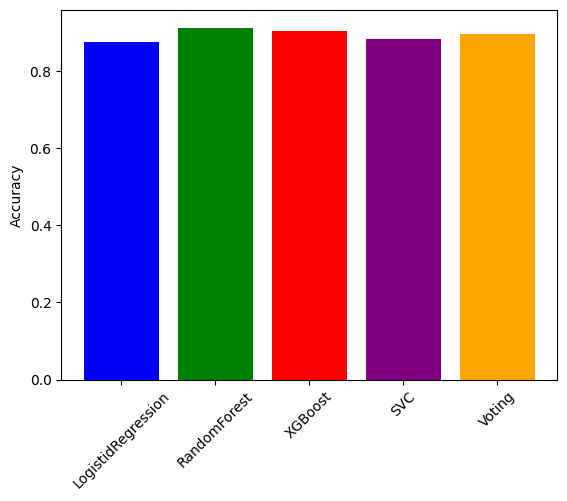

In [98]:
scores = [logistic_score, randomforest_score, xgboost_score, svm_score, voting_score]
models = ['LogistidRegression', 'RandomForest', 'XGBoost', 'SVC', 'Voting']
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.bar(models, scores, color=colors)
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

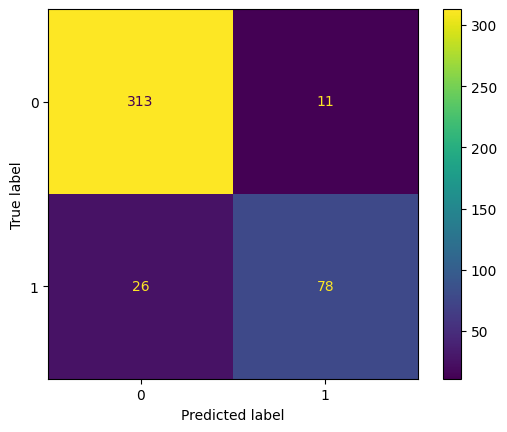

In [103]:
y_pred = model2.predict(x_valid_t) # The best model
cm = confusion_matrix(y_valid, y_pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot()

## Save the best model 🥳🥳🥳

In [105]:
dump(model2, 'trained_model.joblib')

['trained_model.joblib']

Finishhhhhhhhhhhhhhhhhhhh 😍
😍
😍
😍
